# Análise da folha de pagamento da Unitins

In [16]:
import os.path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
from fuzzywuzzy import process

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
df = pd.DataFrame()

if os.path.isfile('folha.csv'):
    df = pd.read_csv("folha.csv", sep=";")
else:
    for ano in range(2008, 2022):
        for mes in range(1, 13):
            clear_output(wait=True)
            print("Referência: {}_{:02}".format(ano, mes))
            url = "https://www.unitins.br/portaltransparencia/folha-de-pagamento?TipoAno={}&tipoMes={:02}&TipoPesquisa=Nome&busca=".format(ano, mes)
            try:
                salario = pd.read_html(url)
                df_salario = pd.DataFrame(salario[0])
                df_salario['referencia'] = "{}_{:02}".format(ano, mes)

                df = df.append(df_salario, ignore_index=True)
            except:
                pass
    df['TOTAL VENCIMENTO*'] = [x.strip("R$ ") for x in df['TOTAL VENCIMENTO*']]
    df['DESCONTO IRRF'] = [x.strip("R$ ") for x in df['DESCONTO IRRF']]
    df['DESCONTO PREVIDÊNCIA'] = [x.strip("R$ ") for x in df['DESCONTO PREVIDÊNCIA']]
    df['DESCONTOS DIVERSOS'] = [x.strip("R$ ") for x in df['DESCONTOS DIVERSOS']]
    df['SALÁRIO LÍQUIDO'] = [x.strip("R$ ") for x in df['SALÁRIO LÍQUIDO']]

    df['TOTAL VENCIMENTO*'] = df['TOTAL VENCIMENTO*'].str.replace('.', "")
    df['TOTAL VENCIMENTO*'] = df['TOTAL VENCIMENTO*'].str.replace(',', ".").astype(float)

    df['DESCONTO IRRF'] = df['DESCONTO IRRF'].str.replace('.', "")
    df['DESCONTO IRRF'] = df['DESCONTO IRRF'].str.replace(',', ".").astype(float)

    df['DESCONTO PREVIDÊNCIA'] = df['DESCONTO PREVIDÊNCIA'].str.replace('.', "")
    df['DESCONTO PREVIDÊNCIA'] = df['DESCONTO PREVIDÊNCIA'].str.replace(',', ".").astype(float)

    df['DESCONTOS DIVERSOS'] = df['DESCONTOS DIVERSOS'].str.replace('.', "")
    df['DESCONTOS DIVERSOS'] = df['DESCONTOS DIVERSOS'].str.replace(',', ".").astype(float)

    df['SALÁRIO LÍQUIDO'] = df['SALÁRIO LÍQUIDO'].str.replace('.', "")
    df['SALÁRIO LÍQUIDO'] = df['SALÁRIO LÍQUIDO'].str.replace(',', ".").astype(float)
    
    df.to_csv("folha.csv", sep=";", index=False)


## Número de servidores na Unitins

In [6]:
# df.head()

print("Total de servidores: ", len(df))
print("Total de efetivos: ", len(df[df['VÍNCULO'] == 'EFETIVO']))
print("Total de comissionados: ", len(df[df['VÍNCULO'] == 'COMISSIONADO']))
print("Total de contratados: ", len(df[df['VÍNCULO'] == 'CONTRATADO']))
print("Total de a disposição: ", len(df[df['VÍNCULO'] == 'EFETIVO/Disp'] ))

Total de servidores:  96941
Total de efetivos:  27535
Total de comissionados:  14222
Total de contratados:  52732
Total de a disposição:  2452


# Contagem de servidores 
Verificar uma forma de contar corretamente o número de servidores.
- Qual o total de servidores por categorias atualmente;
- Qual o total de servidores por categorias em toda a história de 2008 até o momento.



In [13]:
# Resposta do enunciado acima.
# sugestão: fuzzywuzzy



# Questionamento: tempo médio 

Qual é o tempo médio que uma pessoa permance trabalhando na Unitins?

Necessidade de otimização da contagem.

In [127]:
# Resposta do enunciado acima.

nomes = df['NOME COMPLETO'].unique().tolist()
nomes.sort()
variantes = []
unicos = {}

for i, nome in enumerate(nomes):
    res = process.extractOne(nome, nomes[i+1:i+10])
    if res is not None and int(res[1]) > 89:
        variantes.append(nome)
    else:
        unicos[nome] = 0
        

In [132]:
%%time
for ano in range(2008, 2021):
    for mes in range(1, 13):
        filtro_referencia = (df['referencia'] == "{}_{:02}".format(ano, mes))
        clear_output(wait=True)
        print("{}_{:02}".format(ano, mes))
        
        for i, nome in enumerate(unicos):
            res = process.extractOne(nome, df[filtro_referencia]['NOME COMPLETO'].tolist())
            if res[1] > 89:
                unicos[nome] += 1


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


In [131]:
for n in unicos:
    res = process.extractOne(n, variantes)
    if res[1] > 89:
        print(n)

ALESSANDRO HOFMANN T. MENDES
ALEXANDRE ANTONIO DE O. ANDRAD
ANA CARLA ANDRADE P. FRANCA
ANA GLAUCIA V. FERREIRA
ANA IRENE CARNEIRO B. LUCENA
ANA PAULA MONTEIRO DE OLIVEIRA
ANA PRESSILIA SILVA BANDEIRA
ANTONIO CARLOS PEREIRA DE ARAU
ANTONIO RAFAEL DE S.A.BOSSO
ARLENES BUZATTO DELABARY SPADA
CAMILA ROSA NOLASCO CAVALCANTE
CARLOS MANUEL C.CARREIRA
CARLOS ROBERTO DE A.GOMES
CLARISSA ALVES F. DE MENEZES
CLARISSA DE SOUSA O. MCCOY
CLAUDIA R.C.DE CARVALHO
CLAUDIO HENRIQUE C. FERNANDES
CRISTIANA MARIA DE A.S.GOMES
DANIELA DA SILVA PINTO
DEBORA C.A.S. DE ALBUQUERQUE
DEODETE MARIA DAS NEVES SCHMIT
DEUSAFRAN MACEDO DA SILVA
EDIVAN OLIVEIRA CAVALCANTI
ELIANE CRISTINA DE O. A. ABUD
ENEILA DE CASSIA MAIA FERREIRA
EVELIN LORENNA PAIXAO DE GOIS
FATIMA APARECIDA M. DOS SANTOS
FERNANDA CAMPOS DOS R. AGUIAR
FLAVIA CASTRO CABRAL MORAES
FRANCISCA LAYLLA P. DE S. LIMA
FRANCISCO DIMITRE R.P.SANTOS
FRANCISCO FERREIRA M.NETO
GLAUBER CLAUDINO P. DE LIMA
HALAN HEVERTON DOS S.NOBRE
HANARI SANTOS DE A. TAVARES
JAQ

In [7]:
profs = ['PROF. ADJUNTO I', 'PROF. DOUTOR I /2893',
       'PROF. MESTRE I /2893', 'PROF.UNIVERSITARIO 2',
       'PROF.UNIVERSITARIO 3', 'PROF.UNIVERSITARIO I', 'QS PU1PROF ESP. 4',
       'QS PU1PROF. DOUTOR4', 'QS PU1PROF. MESTRE4']

filtro_prof_efetivos = (df['FUNÇÃO'].isin(profs)) & (df['VÍNCULO'] == 'EFETIVO')

# df[filtro_prof_efetivos]

In [46]:
process.extractOne('Maria', nomes[2760:3000])

## Descrição do campo salário líquido: média, menor, maior e moda.

Menor:  -5.7
Maior:  51886.74
Moda:  0.0


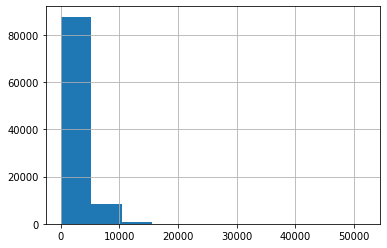

In [8]:
df['SALÁRIO LÍQUIDO'].hist()
print("Menor: ", np.min(df['SALÁRIO LÍQUIDO']))
print("Maior: ", np.max(df['SALÁRIO LÍQUIDO']))
print("Moda: ", df['SALÁRIO LÍQUIDO'].mode()[0])

## Descrição do campo salário bruto: média, menor, maior e moda.

Média:  3299.894802508742
Menor:  0.0
Maior:  67004.96
Moda:  1367.19


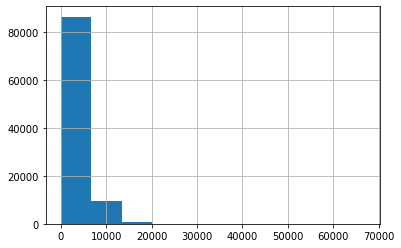

In [9]:
df['TOTAL VENCIMENTO*'].hist()

print("Média: ", np.mean(df['TOTAL VENCIMENTO*']))
print("Menor: ", np.min(df['TOTAL VENCIMENTO*']))
print("Maior: ", np.max(df['TOTAL VENCIMENTO*']))
print("Moda: ", df['TOTAL VENCIMENTO*'].mode()[0])

In [10]:
media_mensal = []
for ano in range(2008, 2022):
    for mes in range(1, 13):
        filtro_referencia = (df['referencia'] == "{}_{:02}".format(ano, mes))
        media = np.mean(df[filtro_referencia]['SALÁRIO LÍQUIDO'])
        if pd.isnull(media) == False:
            media_mensal.append(media)


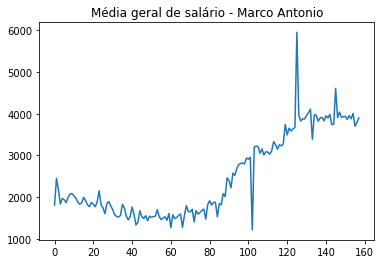

In [11]:
y = np.array(media_mensal)

plt.plot(y)
plt.title("Média geral de salário - Marco Antonio")
plt.show()